# Drawing Histograms

We will use the data found in the NIST website (https://www.itl.nist.gov/div898/handbook/eda/section4/eda4281.htm) to illustrate making histograms. The code will automatically upload the dataset and show the mean of the data and the first five entries. Note that the dataset contains 195 entries in total.

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

file = 'https://raw.githubusercontent.com/Drkaunas/data/refs/heads/main/NISThistogram.csv'
df = pd.read_csv(file)

# Show the first few entries of the dataset
df.head()

,Thermal Resistance
0,9.206343
1,9.299992
2,9.277895
3,9.305795
4,9.275351


Next we will create the histogram using the Seaborn library's default settings.

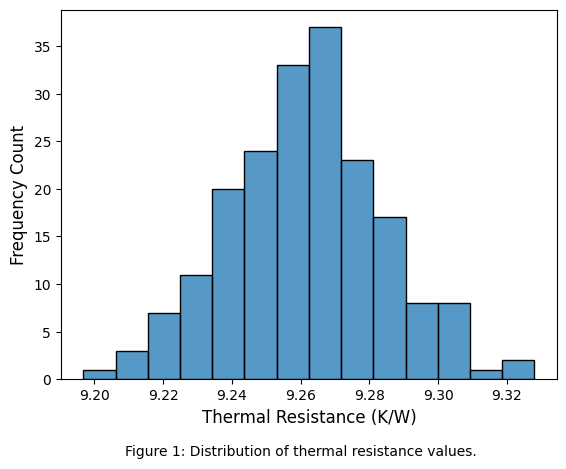

In [24]:
# Create the histogram and assign the Axes object to a variable (ax)
ax = sns.histplot(data=df, x = 'Thermal Resistance')

# Add labels and a title using the ax object or plt functions
ax.set_xlabel('Thermal Resistance (K/W)', fontsize=12)
ax.set_ylabel('Frequency Count', fontsize=12)

# Add the caption using plt.figtext()
# Coordinates are relative to the figure: (0,0) is bottom-left, (1,1) is top-right
plt.figtext(0.5, -0.05, "Figure 1: Distribution of thermal resistance values.", ha="center", fontsize=10)

# Show the plot
plt.show()

The main subtlety that you need to be aware of when drawing histograms is determining where the "breaks" that separate bins should be located, and (relatedly) how many bins there should be. In the figure above, you can see that `seaborn` has made pretty sensible choices all by itself: there are 14 bins, which is essentially the square root of of the number of samples. On the other hand, consider the following two histograms, which have divided the data into fewer and more bins, respectively:

Text(0.5, 1.0, 'Too many bins!')

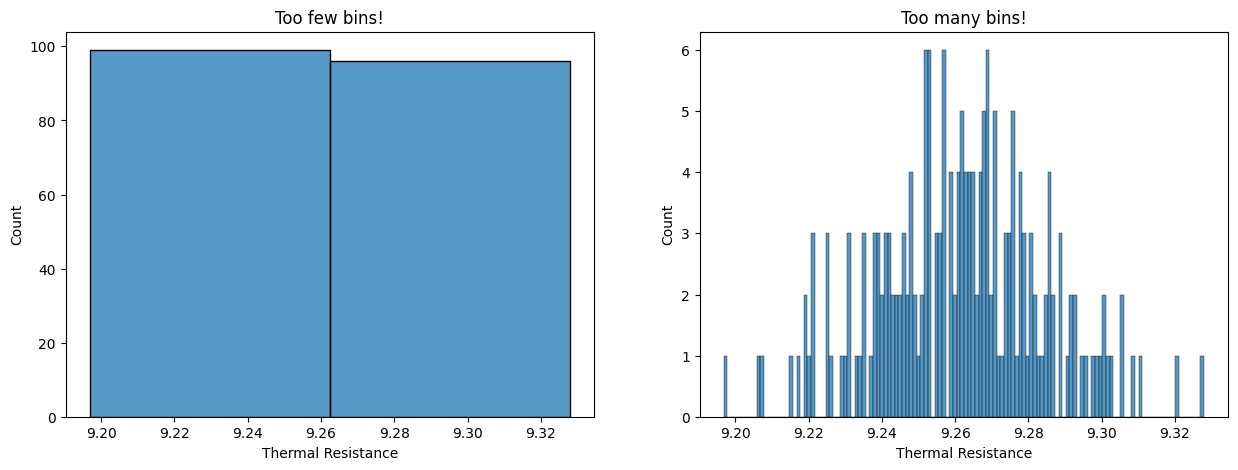

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

ax1 = sns.histplot(data = df, x = 'Thermal Resistance', bins = 2, ax=axes[0])
ax2 = sns.histplot(data = df, x = 'Thermal Resistance', bins = 132, ax=axes[1])

axes[0].set_title("Too few bins!")
axes[1].set_title("Too many bins!")


Although the plot is very informative (it displays the entire data set with no loss of information at all!) the plot is very hard to interpret, and feels quite cluttered. On the other hand, the plot to the left has the opposite problem: it's very easy to "read" this plot, but it doesn't convey a lot of information. One gets the sense that this histogram is hiding too much. In short, the way in which you specify the number of bins has a big effect on what the histogram looks like, so it's important to make sure you choose the breaks sensibly. In general `seaborn` does a pretty good job of selecting the breaks on its own, but nevertheless it's usually a good idea to play around with the bins a bit to see what happens.

### Boxplots

A great alternative to histograms is the **_boxplot_**, sometimes called a "box and whiskers" plot. Like histograms, they're most suited to interval or ratio scale data. The idea behind a boxplot is to provide a simple visual depiction of the median, the interquartile range, and the range of the data. And because they do so in a fairly compact way, boxplots have become a very popular statistical graphic, especially during the exploratory stage of data analysis when you're trying to understand the data yourself. Let's have a look at how they work, again using the NIST data as our example. Firstly, let's actually calculate these numbers ourselves using the `describe()` function:

In [22]:
df.describe()

,Thermal Resistance
count,195.000000
mean,9.261461
std,0.022789
min,9.196848
25%,9.246496
50%,9.261952
75%,9.275530
max,9.327973


So how does a boxplot capture these numbers? The easiest way to describe what a boxplot looks like is just to draw one. The function for doing this in `seaborn` is (surprise, surprise) `boxplot()`.

<Axes: ylabel='Thermal Resistance'>

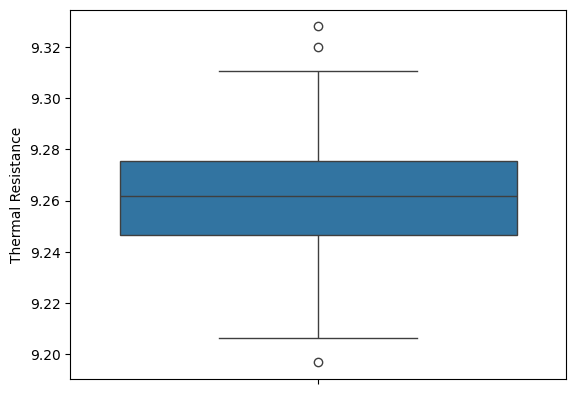

In [23]:
sns.boxplot(data = df, y = 'Thermal Resistance')

When you look at this plot, this is how you should interpret it: the line in the middle of the box is the median; the box itself spans the range from the 25th percentile to the 75th percentile, and the "whiskers" extend to 1.5 times the interquartile range. The two points above the top whisker represent "extreme values", that is, points that fall outside the range of the whiskers.

One small note on the code above: since we are now drawing from data in a dataframe, rather then simply using lists as our data, there are two changes to the way we tell `seaborn` to make a plot. First, we specify the dataframe that stores the data by writing `data = df`. Second, we told `seaborn` which column in `df` to look in for the data by using the name of the column in quotes: `y = 'Thermal Resistance'`.

In the example above, we made a vertical boxplot, which in this case resulted in a fairly squat-looking boxplot. As an alternative, we could display the data on the x-axis instead, which will result in a horizontal boxplot.

<Axes: xlabel='Thermal Resistance'>

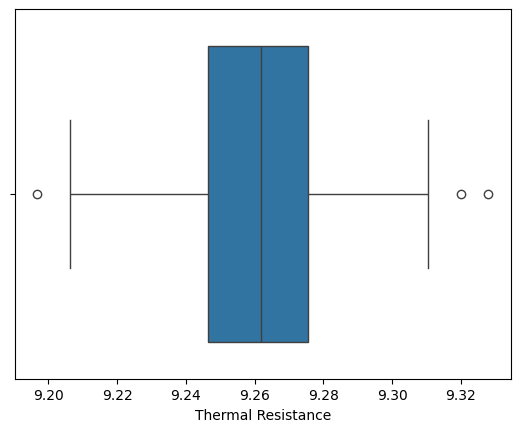

In [26]:
sns.boxplot(data = df, x = 'Thermal Resistance')

Because the boxplot automatically separates out those observations that lie within a certain range, people often use them as an informal method for detecting outliers: observations that are “suspiciously” distant from the rest of the data. Now that I've become suspicious, it's time to look a bit more closely at the data.

In [30]:
IQR = 9.275530-9.246496
high_whisker = 9.275530 + 1.5*IQR
df[df['Thermal Resistance'] > high_whisker]

,Thermal Resistance
44,9.320067
45,9.327973


We see that entries 44 and 45 contain the two outliers on the right. Now, change the code to locate the outlier on the left.

### Drawing multiple boxplots

One last thing. What if you want to draw multiple boxplots at once?

In [31]:
file = 'https://raw.githubusercontent.com/Drkaunas/data/refs/heads/main/chick_weights.csv'
df = pd.read_csv(file)

# Show the first few entries of the dataset
df.head()

,id,weight,sex,feed
0,1.0,179.0,male,Horsebean
1,2.0,160.0,male,Horsebean
2,3.0,136.0,female,Horsebean
3,4.0,227.0,male,Horsebean
4,5.0,217.0,female,Horsebean


With `df.head` we can peek at the first few rows of the dataframe. We see that it has columns with the chick's id, weight, sex and what it was fed. We can also peek at the _last_ few rows, with `tail`:

In [32]:
df.tail()

,id,weight,sex,feed
66,67.0,359.0,male,Casein
67,68.0,216.0,female,Casein
68,69.0,222.0,female,Casein
69,70.0,283.0,male,Casein
70,71.0,332.0,male,Casein


To see how `feed` influences `weight`, we just need to call up `boxplot()` once again, give `seaborn` the name of our dataframe, set the x-axis to "feed" and the y-axis to "weight".

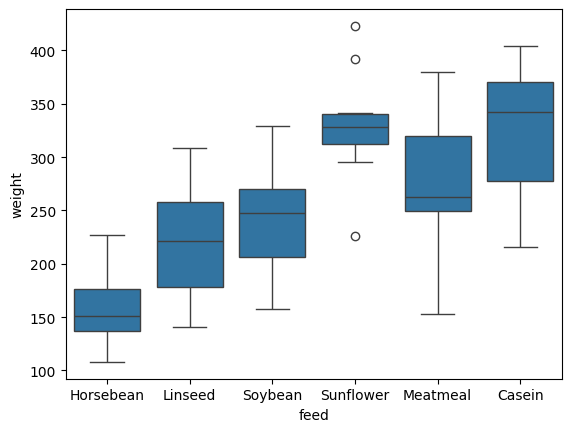

In [39]:
ax = sns.boxplot(x = 'feed', y = 'weight', data = df)


Clearly, there are things we could do to touch this figure up, but at least it gives a sense of why it's sometimes useful to choose boxplots instead of histograms. Even before taking the time to turn this basic output into something more readable, it's possible to get a good sense of what the data look like from year to year without getting overwhelmed with too much detail. Now imagine what would have happened if I'd tried to cram 6 histograms into this space: no chance at all that the reader is going to learn anything useful.

### Alternatives to boxplots

Boxplots are a very effective way to summarize data visually, but there are other methods that are worth pointing out. In the figure below, the same data is represented in three different ways. In the first panel, we see the boxplot, which we already know and love. The middle panel simply plots the data points. All of them. This approach, `stripplot`, shifts (or, as we say in the scientific plotting business, "jitters") the points slightly on the x-axis, so that they don't overlap each other. In the `stripplot`, we can't see exactly where the median or quartiles lie, for instance, like we can in the boxplot, but we can actually see all the data, which I tend to be in favor of. To me, in the boxplots, it sort of looks like all the data points lie inside the box, even though I know that of course this is not true. Then again, although the random jitter insures that the points don't all lie on top of each other, it is still a little difficult to get a feeling for how where most of the points lie. The third plot, in the panel to the right, attempts to solve this problem. This is a `violinplot`, in which the width of the colored area indicates the _density_ of data points. Thus, by looking at where the figure is wide and where it is thin, we can get an intuitive feeling for where most of the points lie.

#### A word of caution on violin plots
An important point to stress is that while every part of the boxplot and stripplot represent exact features of the data, the shape of the violinplot is an estimate (a kernal density estimate, if you want to get techinical), that attempts to show the underlying distribution that produced the data. This will of course always be a best guess, since the true distribution is unknowable, in most cases. Because violin plots show distribution estimates, they cannot be interpreted in exactly the same way as, say, a boxplot. Notice that the default setting in `seaborn` is to draw a little mini boxplot inside the violin plot. This illustrates that the violin plots need to be considered as estimates of the distribution in the data, not true values.

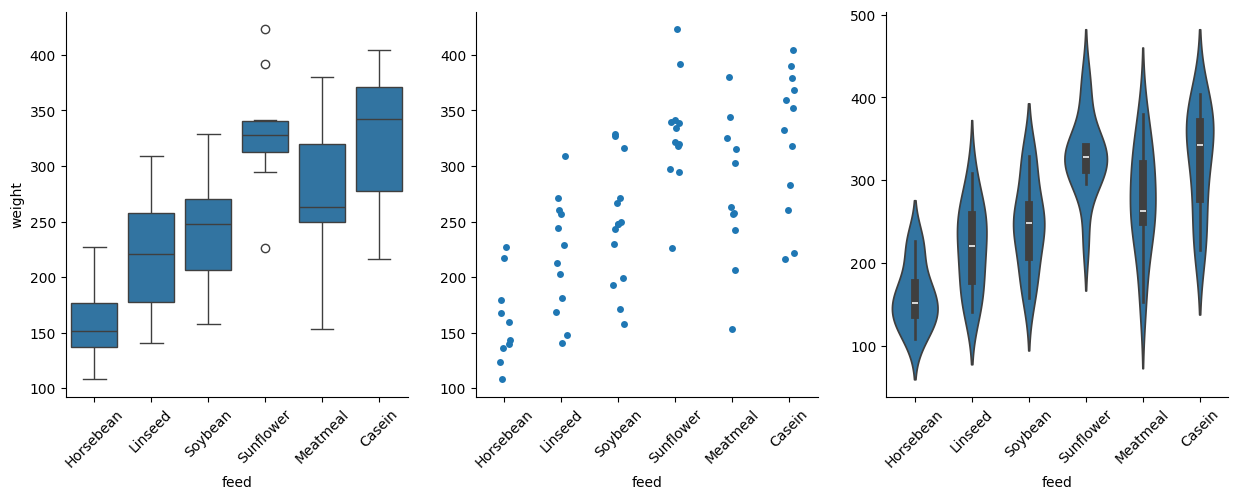

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ax1 = sns.boxplot(x = 'feed', y = 'weight', data = df, ax=axes[0])
ax2 = sns.stripplot(x = 'feed', y = 'weight', data = df, ax=axes[1])
ax3 = sns.violinplot(x = 'feed', y = 'weight', data = df, ax=axes[2])

# rotate the x-axis labels to avoid overlap
ax1.tick_params(axis='x', labelrotation=45)
ax2.tick_params(axis='x', labelrotation=45)
ax3.tick_params(axis='x', labelrotation=45)

# remove y-axis labels for the right two plots
ax2.set(ylabel = '')
ax3.set(ylabel = '')

for ax in axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.savefig('Figure1.png', facecolor = 'white', bbox_inches = 'tight')

## Saving image files

Use the `savefig` command from the `pyplot` library in `matplotlib`. I say fairly, because without a few tweaks, it may give you less than desirable results. In particular, I would like to draw your attention to the arguements `facecolor` and `bbox_inches` in the last line of the code above. Without setting `facecolor` to "white" and `bbox_inches` to "tight", the image is saved with a dark background outside of the main area of the figure, and most of the x-axis labels get cut off on the margins. Why these settings aren't the default I can't imagine, but there is probably some good reason. In any case, using 'savefig' you can export your figure in a variety of formats. Here I have used the .png format. You can then download the image to your computer by clicking on the file folder to the left and then clicking on the 3 dots to reveal the download command.